### Import Package

In [1]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
np.random.seed(1234)
import time
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### Import Data

In [2]:
DIR = 'dataset/'
train = pd.read_csv(DIR+'winequality_train.csv',sep=';') #specify the seperator
test = pd.read_csv(DIR+'winequality_test.csv',sep=';')
Train_X,Train_Y,Test_X,Test_Y = train.iloc[:,0:11],train['quality'],test.iloc[:,0:11],test['quality']
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.4,0.27,0.49,7.30,0.046,53.0,206.0,0.99560,3.24,0.43,9.2,6
2,8.0,0.45,0.28,10.80,0.051,25.0,157.0,0.99570,3.06,0.47,11.4,7
3,7.5,0.38,0.29,4.90,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,7
4,6.9,0.35,0.55,11.95,0.038,22.0,111.0,0.99687,3.11,0.29,9.7,5


### 1.2 Decision Tree

In [3]:
ACCs,PSs,RSs,F1s,TIMEs = [],[],[],[],[] #A list of list to record Each criteria under different parameters
for criterion in ['entropy','gini']:
    ACC,PS,RS,F1,TIME = [],[],[],[],[] #A list to record Each criteria under different parameters
    for depth in [5,10,15,20]:
        start = time.time() #time recorder
        model = DecisionTreeClassifier(criterion=criterion,max_depth=depth)#model
        model.fit(Train_X,Train_Y)
        end = time.time()#time recorder
        print('----------CRITERION = {}, DEPTH = {}----------'.format(criterion,depth))
        prediction = model.predict(Test_X)
        #Get all the criterias score
        acc,ps,rs,f1 = accuracy_score(Test_Y,prediction),precision_score(Test_Y,prediction,average='weighted'),\
                        recall_score(Test_Y,prediction,average='weighted'),f1_score(Test_Y,prediction,average='weighted')
        print('The Accuracy is {:.4f}'.format(acc))
        print('The Precision is {:.4f}'.format(ps))
        print('The Recall is {:.4f}'.format(rs))
        print('The F1-Score is {:.4f}'.format(f1))
        print('The training time is {:.4f} s'.format(end-start))
        ACC.append(acc)
        PS.append(ps)
        RS.append(rs)
        F1.append(f1)
        TIME.append(end-start)
    ACCs.append(ACC)
    PSs.append(PS)
    RSs.append(RS)
    F1s.append(F1)
    TIMEs.append(TIME)

----------CRITERION = entropy, DEPTH = 5----------
The Accuracy is 0.5158
The Precision is 0.5034
The Recall is 0.5158
The F1-Score is 0.4819
The training time is 0.0106 s
----------CRITERION = entropy, DEPTH = 10----------
The Accuracy is 0.5280
The Precision is 0.5163
The Recall is 0.5280
The F1-Score is 0.5190
The training time is 0.0186 s
----------CRITERION = entropy, DEPTH = 15----------
The Accuracy is 0.5729
The Precision is 0.5692
The Recall is 0.5729
The F1-Score is 0.5707
The training time is 0.0233 s
----------CRITERION = entropy, DEPTH = 20----------
The Accuracy is 0.5800
The Precision is 0.5760
The Recall is 0.5800
The F1-Score is 0.5769
The training time is 0.0240 s
----------CRITERION = gini, DEPTH = 5----------
The Accuracy is 0.5260
The Precision is 0.5101
The Recall is 0.5260
The F1-Score is 0.4892
The training time is 0.0079 s
----------CRITERION = gini, DEPTH = 10----------
The Accuracy is 0.5525
The Precision is 0.5471
The Recall is 0.5525
The F1-Score is 0.5444


#### plot the figure to compare

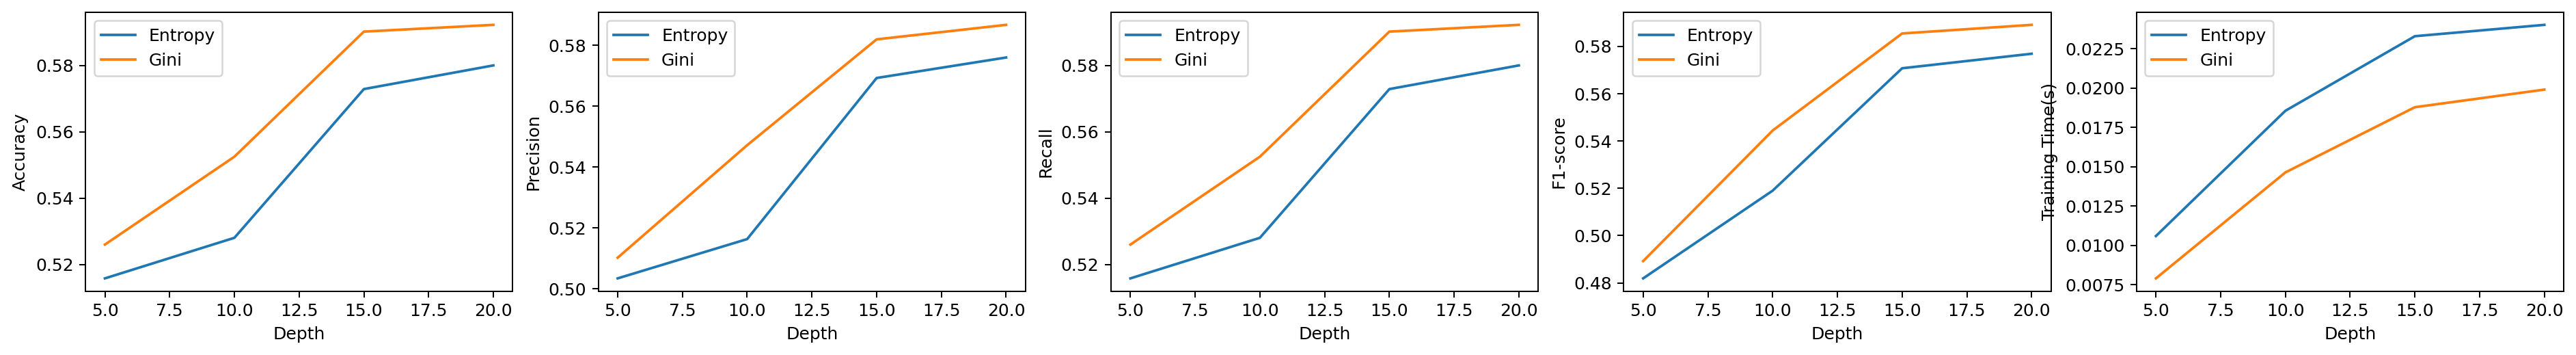

In [4]:
plt.figure(figsize=[26,3],dpi=180)
plt.subplot(1,5,1)
plt.plot([5,10,15,20],ACCs[0],label='Entropy')
plt.plot([5,10,15,20],ACCs[1],label='Gini')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.legend()
plt.subplot(1,5,2)
plt.plot([5,10,15,20],PSs[0],label='Entropy')
plt.plot([5,10,15,20],PSs[1],label='Gini')
plt.ylabel('Precision')
plt.xlabel('Depth')
plt.legend()
plt.subplot(1,5,3)
plt.plot([5,10,15,20],RSs[0],label='Entropy')
plt.plot([5,10,15,20],RSs[1],label='Gini')
plt.ylabel('Recall')
plt.xlabel('Depth')
plt.legend()
plt.subplot(1,5,4)
plt.plot([5,10,15,20],F1s[0],label='Entropy')
plt.plot([5,10,15,20],F1s[1],label='Gini')
plt.ylabel('F1-score')
plt.xlabel('Depth')
plt.legend()
plt.subplot(1,5,5)
plt.plot([5,10,15,20],TIMEs[0],label='Entropy')
plt.plot([5,10,15,20],TIMEs[1],label='Gini')
plt.ylabel('Training Time(s)')
plt.xlabel('Depth')
plt.legend()

### 1.2 KNN & Random Forest

#### KNN, K = 5

In [5]:
k5 = KNeighborsClassifier(n_neighbors=5)
prediction = k5.fit(Train_X,Train_Y).predict(Test_X)
print("For K=5 KNN model, The accuracy is {:.4f}, The precision is {:.4f}, The recall is {:.4f}, The F1-Score is {:.4f}, Training Time = 0s".format(
        accuracy_score(Test_Y,prediction),precision_score(Test_Y,prediction,average='weighted'),\
                        recall_score(Test_Y,prediction,average='weighted'),f1_score(Test_Y,prediction,average='weighted')))

For K=5 KNN model, The accuracy is 0.4873, The precision is 0.4683, The recall is 0.4873, The F1-Score is 0.4714, Training Time = 0s


#### KNN, K = 21

In [6]:
k21 = KNeighborsClassifier(n_neighbors=21)
prediction = k21.fit(Train_X,Train_Y).predict(Test_X)
print("For K=21 KNN model, The accuracy is {:.4f}, The precision is {:.4f}, The recall is {:.4f}, The F1-Score is {:.4f}, Training Time = 0s".format(
        accuracy_score(Test_Y,prediction),precision_score(Test_Y,prediction,average='weighted'),\
                        recall_score(Test_Y,prediction,average='weighted'),f1_score(Test_Y,prediction,average='weighted')))

For K=21 KNN model, The accuracy is 0.4577, The precision is 0.4425, The recall is 0.4577, The F1-Score is 0.4133, Training Time = 0s


#### KNN, K = 5 and using weighted distance

In [7]:
k5_weighted = KNeighborsClassifier(n_neighbors=5,weights='distance')
prediction = k5_weighted.fit(Train_X,Train_Y).predict(Test_X)
print("For K=5 KNN model with weighted distance, The accuracy is {:.4f}, The precision is {:.4f}, The recall is {:.4f}, The F1-Score is {:.4f}, Training Time = 0s".format(
        accuracy_score(Test_Y,prediction),precision_score(Test_Y,prediction,average='weighted'),\
                        recall_score(Test_Y,prediction,average='weighted'),f1_score(Test_Y,prediction,average='weighted')))

For K=5 KNN model with weighted distance, The accuracy is 0.5902, The precision is 0.5882, The recall is 0.5902, The F1-Score is 0.5799, Training Time = 0s


#### Random Forest

In [8]:
random_forest = RandomForestClassifier()
start = time.time()
random_forest.fit(Train_X,Train_Y)
end = time.time()
prediction = random_forest.predict(Test_X)
print("For Random Forest, The accuracy is {:.4f}, The precision is {:.4f}, The recall is {:.4f}, The F1-Score is {:.4f}, Training Time = {:.4f}".format(
        accuracy_score(Test_Y,prediction),precision_score(Test_Y,prediction,average='weighted'),\
                        recall_score(Test_Y,prediction,average='weighted'),f1_score(Test_Y,prediction,average='weighted'),end-start))

For Random Forest, The accuracy is 0.6544, The precision is 0.6662, The recall is 0.6544, The F1-Score is 0.6399, Training Time = 0.4488
